In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error

In [328]:
#Load required data
# Read the data
train_data = pd.read_csv("regression_train.txt", sep=" ", header=None, names=["x", "y"])
test_data = pd.read_csv("regression_test.txt", sep=" ", header=None, names=["x", "y"])

# Extract x and y values
x_train = train_data["x"].values.reshape(-1, 1)
y_train = train_data["y"].values
x_test = test_data["x"].values.reshape(-1, 1)
y_test = test_data["y"].values

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Standardize training data
x_test = scaler.transform(x_test)       # Use the same scaler for test data





In [168]:
N = len(x_train)
X_bias = np.concatenate([np.ones((x_train.shape[0], 1)), x_train.reshape(-1, 1)], axis=1)
w, _, _, _ = np.linalg.lstsq(X_bias, y_train, rcond=None)
intercept, slope = w
print(X_bias[:5, :])
print(X_bias.shape)
y_train_pred = X_bias @ w
print(w)

print(f'Intercept (w0): {intercept}')
print(f'Slope (w1): {slope}')



[[ 1.         -1.71481604]
 [ 1.         -1.68017329]
 [ 1.         -1.64553055]
 [ 1.         -1.6108878 ]
 [ 1.         -1.57624505]]
(100, 2)
[ 97.81981869 311.69798282]
Intercept (w0): 97.81981869046018
Slope (w1): 311.69798282405714


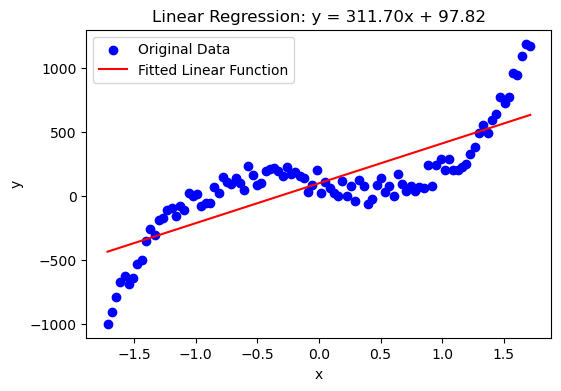

In [174]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x_train, y_train, color='blue', label='Original Data')
ax.plot(x_train, y_train_pred, color='red', label='Fitted Linear Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title(f'Linear Regression: y = {w[1]:.2f}x + {w[0]:.2f}')
plt.show()

Linear Regression MSE (Train): 50335.54604695737
Linear Regression MSE (Test): 22848693.32084565


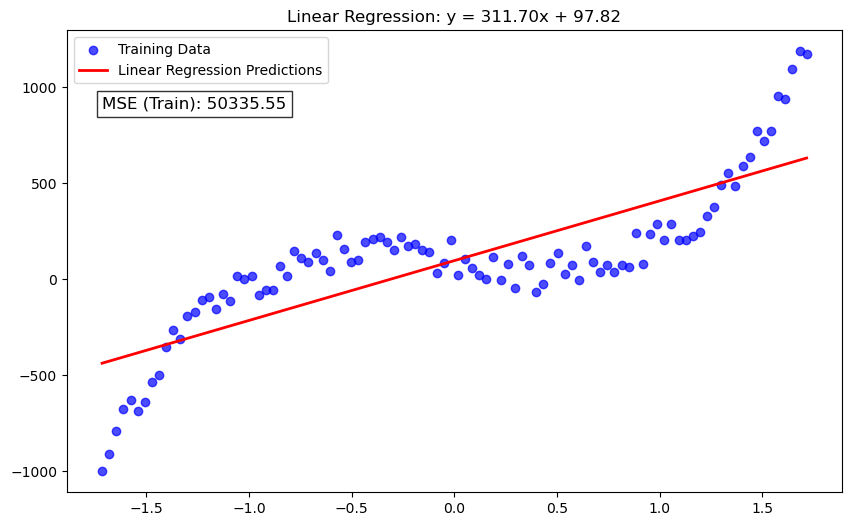

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit a linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

# Make predictions
y_train_pred_lr = lin_reg_model.predict(x_train)
y_test_pred_lr = lin_reg_model.predict(x_test)

# Compute RMSE
# Compute MSE for Linear Regression
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

print(f"Linear Regression MSE (Train): {mse_train_lr}")
print(f"Linear Regression MSE (Test): {mse_test_lr}")

slope = lin_reg_model.coef_[0]
intercept = lin_reg_model.intercept_

# Plot Linear Regression predictions (Training data)
# Plot Linear Regression predictions (Training data)
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label="Training Data", alpha=0.7, color="blue")
plt.plot(x_train, y_train_pred_lr, color="red", label="Linear Regression Predictions", linewidth=2)
plt.title(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
plt.legend()

# Add MSE text to the plot
plt.text(
    x_train.min(),  # X-coordinate for text placement
    y_train.max()-300,  # Y-coordinate for text placement
    f"MSE (Train): {mse_train_lr:.2f}",
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.8)
)

plt.show()


Root Mean Squared Error (RMSE): 60.99973650892675
Mean Squared Error (MSE): 3720.9678541584913
Root Mean Squared Error (RMSE) - Test: 75.074214363339
Mean Squared Error (MSE) - Test: 5636.137662272576


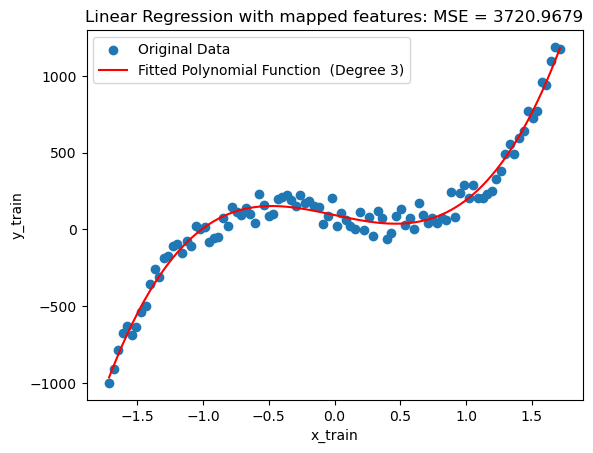

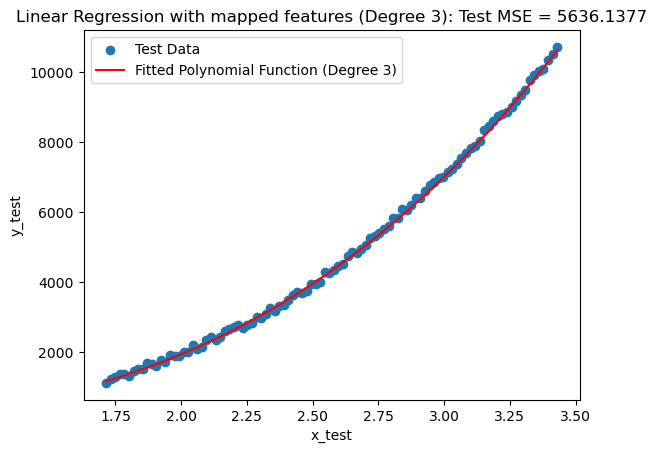

In [329]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Apply Polynomial Transformation (degree 3 for cubic fit)
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x_train.reshape(-1, 1))
x_test_poly = poly.transform(x_test.reshape(-1, 1))

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)

# Make predictions using the polynomial model
y_poly_pred = poly_model.predict(x_poly)
y_test_pred = poly_model.predict(x_test_poly)

# Calculate RMSE and MSE
mse_train= mean_squared_error(y_train, y_poly_pred)
rmse_train = np.sqrt(mse_train)
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Squared Error (MSE): {mse_train}")

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) - Test: {rmse_test}")
print(f"Mean Squared Error (MSE) - Test: {mse_test}")
# Plotting the data and polynomial fit
plt.scatter(x_train, y_train, label='Original Data')
plt.plot(x_train, y_poly_pred, color='red', label='Fitted Polynomial Function  (Degree 3)')
plt.title(f'Linear Regression with mapped features: MSE = {mse_train:.4f}')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

plt.scatter(x_test, y_test, label='Test Data')
plt.plot(x_test, y_test_pred, color='red', label='Fitted Polynomial Function (Degree 3)')
plt.title(f'Linear Regression with mapped features (Degree 3): Test MSE = {mse_test:.4f}')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

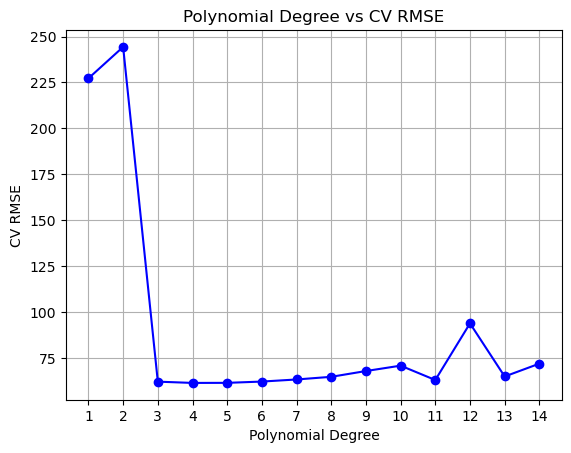

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Assuming x_train and y_train are your data
x_train = np.array(x_train).reshape(-1, 1)  # Ensure x_train is a 2D array
y_train = np.array(y_train)

# Initialize an array to store CV RMSE for different polynomial degrees
degrees = np.arange(1, 15)  # Test polynomial degrees from 1 to 14
cv_rmse_scores = []

# Define the number of splits for K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over polynomial degrees
for degree in degrees:
    # Generate polynomial features for each degree
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    rmse_list = []
    
    # Perform K-Fold cross-validation
    for train_index, val_index in kf.split(x_train):
        # Split the data into training and validation sets
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Transform the training and validation sets
        x_train_poly = poly.fit_transform(x_train_fold)
        x_val_poly = poly.transform(x_val_fold)
        
        # Initialize the linear regression model
        model = LinearRegression()
        
        # Fit the model on the training fold
        model.fit(x_train_poly, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = model.predict(x_val_poly)
        
        # Calculate RMSE for the validation fold
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        rmse_list.append(rmse)
    
    # Average RMSE across all folds
    cv_rmse_scores.append(np.mean(rmse_list))

# Plot CV RMSE vs Polynomial Degree
plt.plot(degrees, cv_rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Polynomial Degree vs CV RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('CV RMSE')
plt.grid(True)
plt.xticks(degrees)
plt.show()


In [ ]:
y_test_pred 

Epoch 50/500, Loss: 155346.1875
Epoch 100/500, Loss: 151241.0625
Epoch 150/500, Loss: 142816.375
Epoch 200/500, Loss: 129258.1171875
Epoch 250/500, Loss: 111476.8125
Epoch 300/500, Loss: 92463.4375
Epoch 350/500, Loss: 76229.5
Epoch 400/500, Loss: 65280.671875
Epoch 450/500, Loss: 59387.375
Epoch 500/500, Loss: 56027.18359375
Neural Network RMSE (Train): 236.58280912761313
Neural Network RMSE (Test): 55971.42557471262


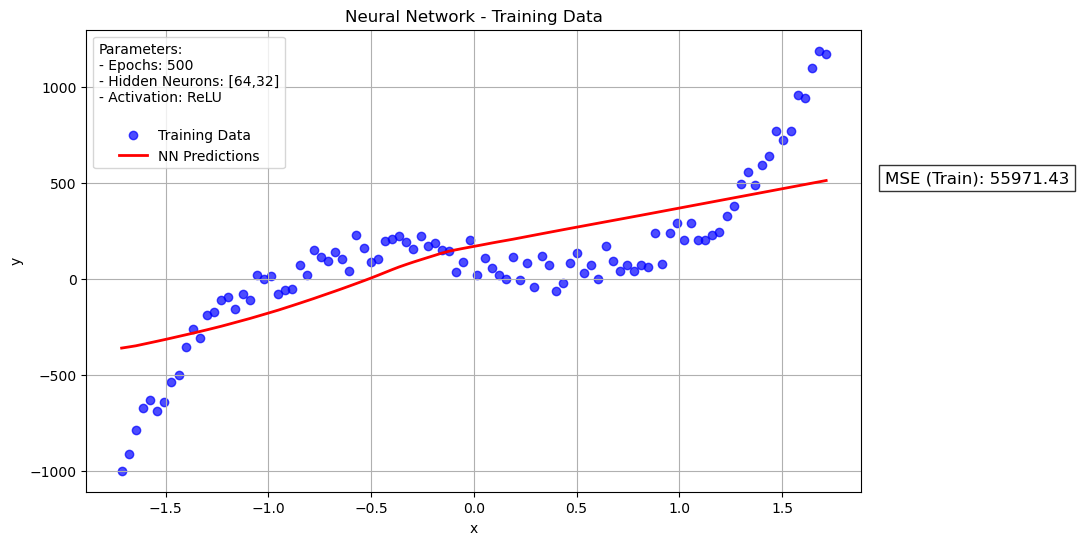

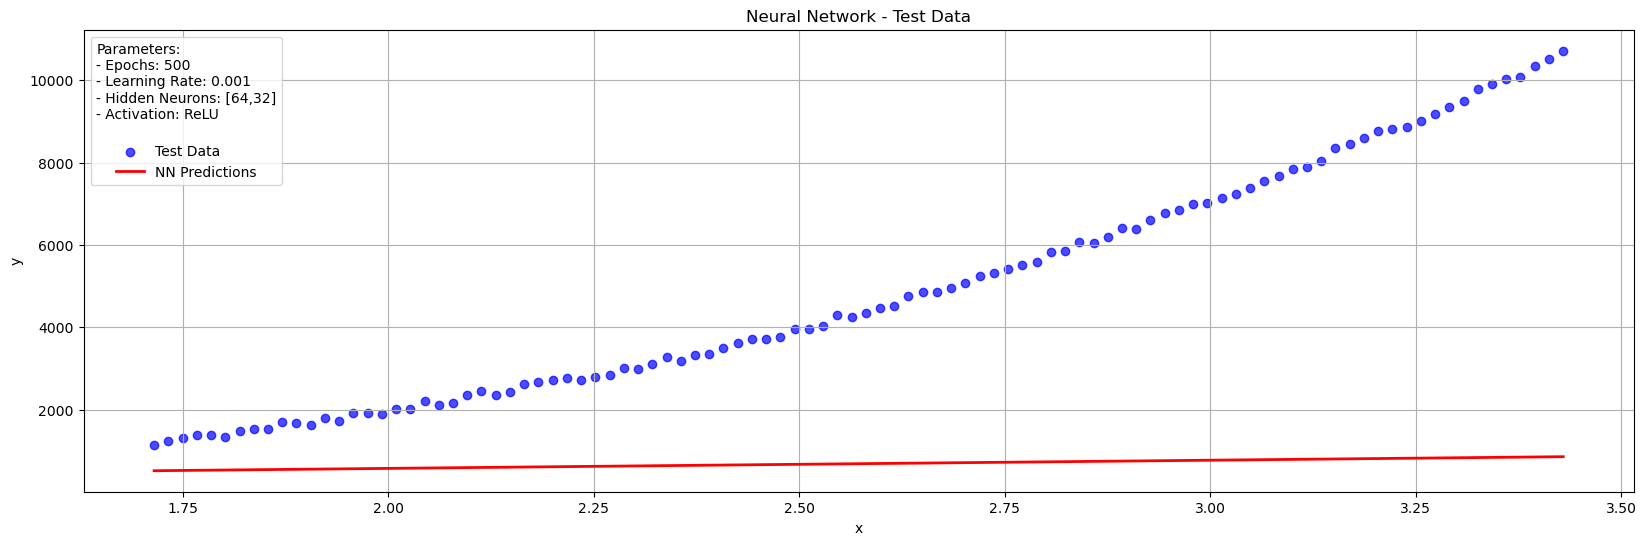

In [221]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Convert data to tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

# Initialize model, loss, and optimizer
nn_model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters())

# Train the neural network
epochs = 500
for epoch in range(epochs):
    nn_model.train()
    optimizer.zero_grad()
    predictions = nn_model(x_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Predictions
nn_model.eval()
y_train_pred_nn = nn_model(x_train_tensor).detach().numpy()
y_test_pred_nn = nn_model(x_test_tensor).detach().numpy()

# Mean Squared Error
rmse_train_nn = sqrt(mean_squared_error(y_train, y_train_pred_nn))
mse_train_nn = mean_squared_error(y_train, y_train_pred_nn)

print("Neural Network RMSE (Train):", rmse_train_nn)
print("Neural Network RMSE (Test):", mse_train_nn)

# Plot training data with legend including hyperparameters
plt.figure(figsize=(10, 6))
plt.scatter(x_train_tensor, y_train_tensor, label="Training Data", alpha=0.7, color="blue")
plt.plot(x_train, y_train_pred_nn, color="red", label="NN Predictions", linewidth=2)
plt.title("Neural Network - Training Data")
plt.legend(
    title=(
        "Parameters:\n"
        f"- Epochs: {epochs}\n"
        f"- Hidden Neurons: [64,32]\n"
        f"- Activation: ReLU\n"
    )
)

plt.text(
    2, 500,  # X and Y coordinates (fix: they must come first!)
    f"MSE (Train): {mse_train_nn:.2f}",
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.8)
)

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Plot test data with legend including hyperparameters
plt.figure(figsize=(20, 6))
plt.scatter(x_test, y_test, label="Test Data", alpha=0.7, color="blue")
plt.plot(x_test, y_test_pred_nn, color="red", label="NN Predictions", linewidth=2)
plt.title("Neural Network - Test Data")
plt.legend(
    title=(
        "Parameters:\n"
        f"- Epochs: {epochs}\n"
        f"- Learning Rate: 0.001\n"
        f"- Hidden Neurons: [64,32]\n"
        f"- Activation: ReLU\n"
    )
)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [226]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

# Define the PyTorch model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

# Train the model for one fold
def train_model(x_train, y_train, x_val, y_val, learning_rate, alpha, epochs=500):
    model = NeuralNetwork()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)
        
        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg
        
        loss.backward()
        optimizer.step()

    # Validation RMSE
    model.eval()
    with torch.no_grad():
        val_predictions = model(x_val_tensor).numpy()
        rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    return rmse

# Perform k-fold cross-validation for a given parameter set
def k_fold_validation(x, y, learning_rate, alpha, epochs=1000, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, val_idx in kf.split(x):
        x_train_fold, x_val_fold = x[train_idx], x[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        rmse = train_model(x_train_fold, y_train_fold, x_val_fold, y_val_fold, learning_rate, alpha, epochs)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)  # Average RMSE across folds

# Perform hyperparameter search and generate the plot
def hyperparameter_search_and_plot(x_train, y_train, k=5):
    learning_rates = np.logspace(-4, -2, 5)
    alphas = np.logspace(-3, 0, 5)

    results = []
    best_rmse = float('inf')
    best_params = None

    for lr in learning_rates:
        for alpha in alphas:
            print(f"Training with learning_rate={lr}, alpha={alpha}")
            rmse = k_fold_validation(x_train, y_train, lr, alpha, epochs=1000, k=k)
            results.append((lr, alpha, rmse))
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (lr, alpha)

    # Generate the plot
    learning_rates, alphas, rmses = zip(*results)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(np.log10(learning_rates), np.log10(alphas), c=rmses, cmap='viridis', s=100)
    plt.colorbar(scatter, label="Validation RMSE")
    plt.title("Validation RMSE Across Hyperparameter Combinations")
    plt.xlabel("Log10 Learning Rate")
    plt.ylabel("Log10 Regularization Alpha")
    plt.show()

    print(f"Best Parameters: learning_rate={best_params[0]}, alpha={best_params[1]}")
    print(f"Best RMSE: {best_rmse}")
    return best_params


Training with learning_rate=0.0001, alpha=0.001
Training with learning_rate=0.0001, alpha=0.005623413251903491
Training with learning_rate=0.0001, alpha=0.03162277660168379
Training with learning_rate=0.0001, alpha=0.1778279410038923
Training with learning_rate=0.0001, alpha=1.0
Training with learning_rate=0.00031622776601683794, alpha=0.001
Training with learning_rate=0.00031622776601683794, alpha=0.005623413251903491
Training with learning_rate=0.00031622776601683794, alpha=0.03162277660168379
Training with learning_rate=0.00031622776601683794, alpha=0.1778279410038923
Training with learning_rate=0.00031622776601683794, alpha=1.0
Training with learning_rate=0.001, alpha=0.001
Training with learning_rate=0.001, alpha=0.005623413251903491
Training with learning_rate=0.001, alpha=0.03162277660168379
Training with learning_rate=0.001, alpha=0.1778279410038923
Training with learning_rate=0.001, alpha=1.0
Training with learning_rate=0.0031622776601683794, alpha=0.001
Training with learning

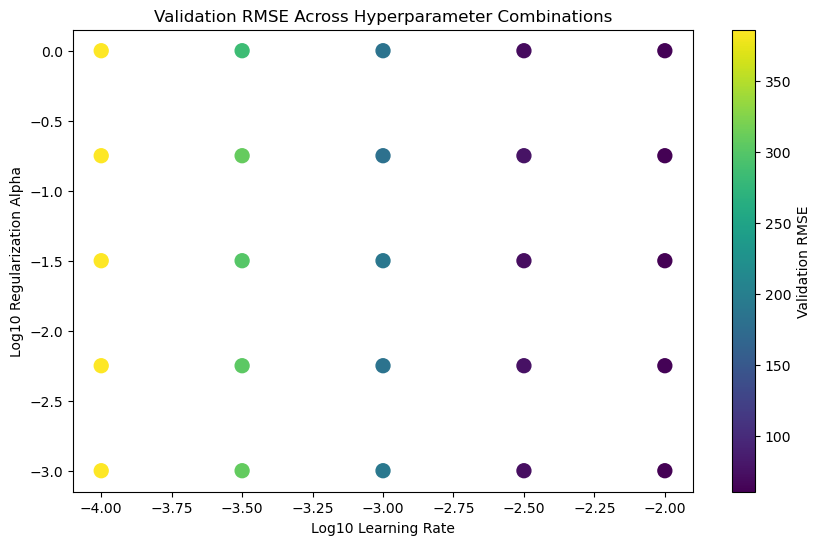

Best Parameters: learning_rate=0.01, alpha=0.1778279410038923
Best RMSE: 61.05316490886662


In [227]:
best_params = hyperparameter_search_and_plot(x_train, y_train)


Final Training RMSE: 53.72188659371444


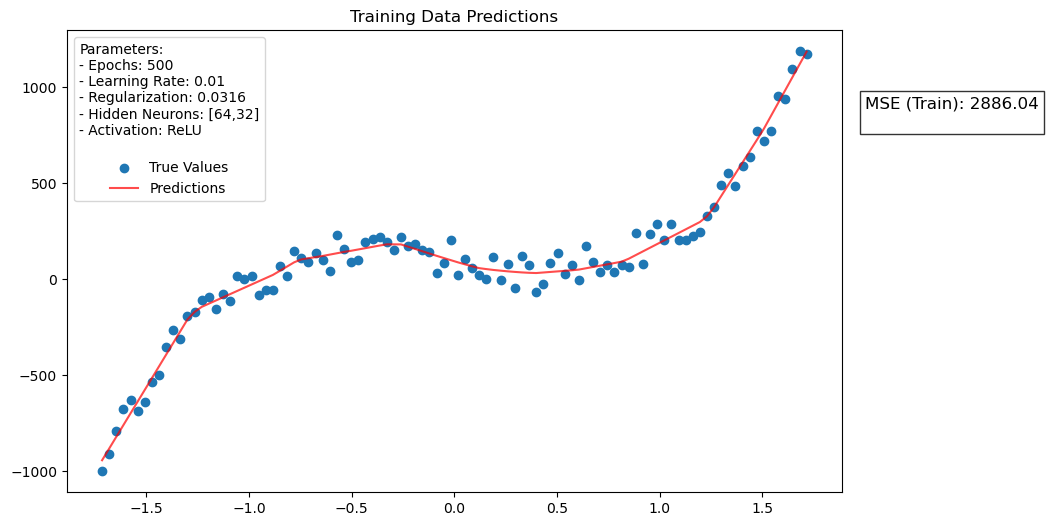

In [231]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the PyTorch model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

# Final training function
def final_training(x_train, y_train, learning_rate, alpha, epochs=500):
    model = NeuralNetwork()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)
        
        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg
        
        loss.backward()
        optimizer.step()

    # Final Training RMSE
    model.eval()
    with torch.no_grad():
        train_predictions = model(x_train_tensor).numpy()
        rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
        mse_train_nn = mean_squared_error(y_train, train_predictions)
    print(f"Final Training RMSE: {rmse_train}")

    # Plot predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label="True Values")
    plt.plot(x_train, train_predictions, label="Predictions",alpha=0.7, color="red")
    plt.title("Training Data Predictions")
    plt.legend(
    title=(
        "Parameters:\n"
        f"- Epochs: {epochs}\n"
        f"- Learning Rate: 0.01\n"
        f"- Regularization: 0.0316\n"  # Add regularization here
        f"- Hidden Neurons: [64,32]\n"
        f"- Activation: ReLU\n"
    )
)
    plt.text(
    2, 800,  # Adjust X and Y coordinates based on your plot's range
    (
        f"MSE (Train): {mse_train_nn:.2f}\n"
    ),
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.8)
)
    plt.show()

    return model, rmse_train

# Load the dataset (assuming x_train and y_train are already loaded)
# Replace with your actual dataset loading code

# Use the best parameters obtained
final_learning_rate = 0.01
final_alpha = 0.03162277660168379  # Regularization parameter

# Train the final model
final_model, final_rmse = final_training(x_train, y_train, final_learning_rate, final_alpha)


In [232]:
def train_with_validation_tracking(x_train, y_train, validation_split=0.2, learning_rate=0.01, alpha=0.0316, max_epochs=3000):
    # Split training data into training and validation sets
    split_idx = int((1 - validation_split) * len(x_train))

    x_train_split, x_val_split = x_train[:split_idx], x_train[split_idx:]
    y_train_split, y_val_split = y_train[:split_idx], y_train[split_idx:]
    
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train_split, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_split, dtype=torch.float32).view(-1, 1)
    x_val_tensor = torch.tensor(x_val_split, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_split, dtype=torch.float32).view(-1, 1)

    # Initialize model, loss, and optimizer
    model = NeuralNetwork()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    training_rmse = []  # Track RMSE on training set
    validation_rmse = []  # Track RMSE on validation set

    for epoch in range(max_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)
        
        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg
        
        loss.backward()
        optimizer.step()

        # Compute RMSE on training set
        model.eval()
        with torch.no_grad():
            train_predictions = model(x_train_tensor).numpy()
            val_predictions = model(x_val_tensor).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train_split, train_predictions))
            val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
        
        training_rmse.append(train_rmse)
        validation_rmse.append(val_rmse)

        # Optional: Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{max_epochs}, Training RMSE: {train_rmse}, Validation RMSE: {val_rmse}")

    # Plot training and validation RMSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_epochs + 1), training_rmse, label="Training RMSE")
    plt.plot(range(1, max_epochs + 1), validation_rmse, label="Validation RMSE", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("Training and Validation RMSE vs. Epochs")
    plt.legend()
    plt.show()

    return model, training_rmse, validation_rmse


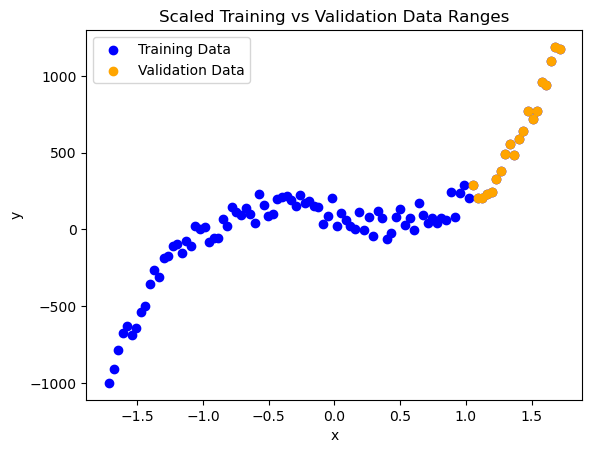

In [239]:
split_idx = int((1 - 0.2) * len(x_train))

x_train_split, x_val = x_train[:split_idx], x_train[split_idx:]
y_train_split, y_val= y_train[:split_idx], y_train[split_idx:]

plt.scatter(x_train, y_train, label='Training Data', color='blue')
plt.scatter(x_val, y_val, label='Validation Data', color='orange')
plt.legend()
plt.title('Scaled Training vs Validation Data Ranges')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [259]:
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_with_validation_tracking_transformed(x_train, y_train, validation_split=0.2, degree=3, learning_rate=0.01, alpha=0.0316, max_epochs=3000):
    # Step 1: Apply Polynomial Feature Transformation
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_transformed = poly.fit_transform(x_train)  # Transform the input features
    
    # Step 2: Split Transformed Data into Training and Validation Sets
    split_idx = int((1 - validation_split) * len(x_transformed))

    x_train_split, x_val_split = x_transformed[:split_idx], x_transformed[split_idx:]
    y_train_split, y_val_split = y_train[:split_idx], y_train[split_idx:]
    
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train_split, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_split, dtype=torch.float32).view(-1, 1)
    x_val_tensor = torch.tensor(x_val_split, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_split, dtype=torch.float32).view(-1, 1)

    # Step 3: Define Neural Network with Input Size Matching Transformed Features
    input_size = x_transformed.shape[1]  # Number of transformed features
    class NeuralNetworkTransformed(nn.Module):
        def __init__(self):
            super(NeuralNetworkTransformed, self).__init__()
            self.layer1 = nn.Linear(input_size, 64)
            self.relu1 = nn.ReLU()
            self.layer2 = nn.Linear(64, 32)
            self.relu2 = nn.ReLU()
            self.layer3 = nn.Linear(32, 1)

        def forward(self, x):
            x = self.layer1(x)
            x = self.relu1(x)
            x = self.layer2(x)
            x = self.relu2(x)
            x = self.layer3(x)
            return x

    model = NeuralNetworkTransformed()
    
    # Step 4: Set Loss Function and Optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    training_rmse = []  # Track RMSE on training set
    validation_rmse = []  # Track RMSE on validation set

    for epoch in range(max_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)
        
        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg
        
        loss.backward()
        optimizer.step()

        # Compute RMSE on training and validation sets
        model.eval()
        with torch.no_grad():
            train_predictions = model(x_train_tensor).numpy()
            val_predictions = model(x_val_tensor).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train_split, train_predictions))
            val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
        
        training_rmse.append(train_rmse)
        validation_rmse.append(val_rmse)

        # Optional: Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{max_epochs}, Training RMSE: {train_rmse:.4f}, Validation RMSE: {val_rmse:.4f}")

    # Plot training and validation RMSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_epochs + 1), training_rmse, label="Training RMSE")
    plt.plot(range(1, max_epochs + 1), validation_rmse, label="Validation RMSE", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title(f"Training and Validation RMSE vs. Epochs (Polynomial Degree: {degree})")
    plt.legend()
    plt.show()

    return model, training_rmse, validation_rmse


Epoch 100/600, Training RMSE: 64.4036, Validation RMSE: 354.4908
Epoch 200/600, Training RMSE: 56.7411, Validation RMSE: 190.1727
Epoch 300/600, Training RMSE: 54.8958, Validation RMSE: 157.8501
Epoch 400/600, Training RMSE: 54.3729, Validation RMSE: 140.4748
Epoch 500/600, Training RMSE: 53.6238, Validation RMSE: 96.9967
Epoch 600/600, Training RMSE: 53.3808, Validation RMSE: 95.1741


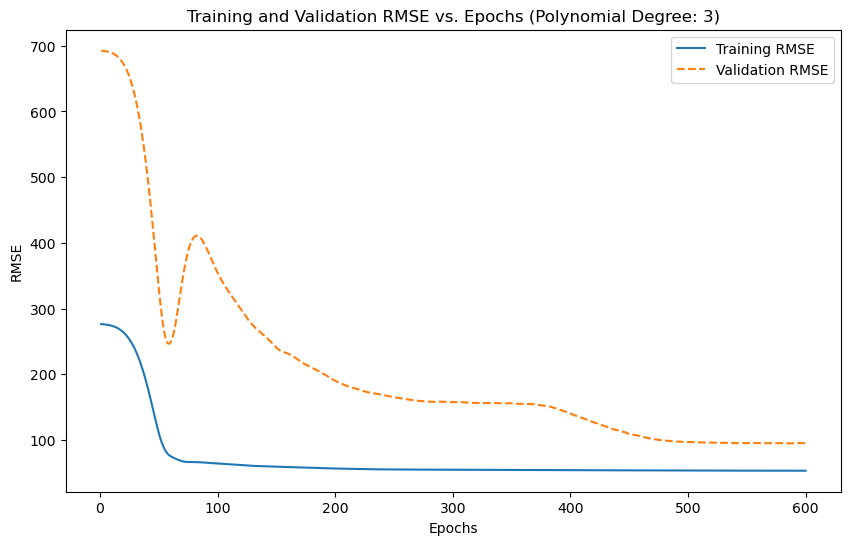

In [260]:
final_model, training_rmse, validation_rmse = train_with_validation_tracking_transformed(
    x_train, y_train, validation_split=0.2, learning_rate=0.01, alpha=0.03162277660168379, max_epochs=600
)


In [266]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


def train_with_dropout(
    x_train, y_train, dropout_rate=0.2, learning_rate=0.01, alpha=0.0316, max_epochs=500
):
    # Define the neural network with dropout
    input_size = x_train.shape[1]

    class NeuralNetworkWithDropout(nn.Module):
        def __init__(self, dropout_rate):
            super(NeuralNetworkWithDropout, self).__init__()
            self.layer1 = nn.Linear(input_size, 64)
            self.relu1 = nn.ReLU()
            self.dropout1 = nn.Dropout(dropout_rate)
            self.layer2 = nn.Linear(64, 32)
            self.relu2 = nn.ReLU()
            self.dropout2 = nn.Dropout(dropout_rate)
            self.layer3 = nn.Linear(32, 1)

        def forward(self, x):
            x = self.layer1(x)
            x = self.relu1(x)
            x = self.dropout1(x)
            x = self.layer2(x)
            x = self.relu2(x)
            x = self.dropout2(x)
            x = self.layer3(x)
            return x

    # Initialize the model, loss function, and optimizer
    model = NeuralNetworkWithDropout(dropout_rate)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    training_rmse = []

    for epoch in range(max_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        predictions = model(torch.tensor(x_train, dtype=torch.float32))
        loss = criterion(predictions, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))

        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg

        loss.backward()
        optimizer.step()

        # Compute RMSE on the entire dataset
        model.eval()
        with torch.no_grad():
            train_predictions = model(torch.tensor(x_train, dtype=torch.float32)).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

        training_rmse.append(train_rmse)

    return model, training_rmse


def evaluate_dropout_rates(
    x_train,
    y_train,
    dropout_rates=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    learning_rate=0.01,
    alpha=0.0316,
    max_epochs=300,
):
    results = []  # To store dropout rate and RMSE

    for rate in dropout_rates:
        print(f"Training with Dropout Rate: {rate}")
        model, training_rmse = train_with_dropout(
            x_train=x_train,
            y_train=y_train,
            dropout_rate=rate,
            learning_rate=learning_rate,
            alpha=alpha,
            max_epochs=max_epochs,
        )
        # Record the final RMSE for the training set
        results.append((rate, training_rmse[-1]))

    # Extract and plot results
    dropout_rates, train_rmses = zip(*results)
    plt.figure(figsize=(10, 6))
    plt.plot(dropout_rates, train_rmses, marker="o", label="Training RMSE")
    plt.xlabel("Dropout Rate")
    plt.ylabel("RMSE")
    plt.title("Dropout Rate vs. Training RMSE")
    plt.legend()
    plt.grid()
    plt.show()

    return results


(100, 3)
Training with Dropout Rate: 0.0
Training with Dropout Rate: 0.1
Training with Dropout Rate: 0.2
Training with Dropout Rate: 0.3
Training with Dropout Rate: 0.4
Training with Dropout Rate: 0.5
Training with Dropout Rate: 0.6
Training with Dropout Rate: 0.7
Training with Dropout Rate: 0.8
Training with Dropout Rate: 0.9


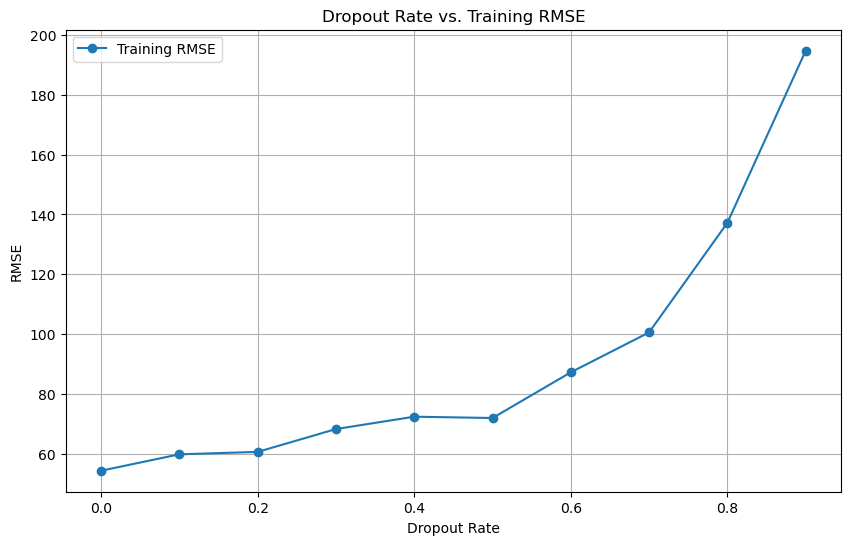

In [268]:
print(x_train_poly.shape)
results = evaluate_dropout_rates(
    x_train=x_train_poly,
    y_train=y_train,
    dropout_rates=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9],
    learning_rate=0.01,
    alpha=0.0316,
    max_epochs=500
)



In [187]:
import torch.nn as nn

# Generalized neural network model
class FlexibleNN(nn.Module):
    def __init__(self, input_size, hidden_layers, dropout_rate):
        super(FlexibleNN, self).__init__()
        layers = []
        in_features = input_size

        # Add hidden layers
        for out_features in hidden_layers:
            layers.append(nn.Linear(in_features, out_features))
            layers.append(nn.ReLU())
            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate))
            in_features = out_features

        # Output layer
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


In [191]:
def train_nn_on_training_data(hidden_layers, dropout_rate, learning_rate=0.01, epochs=500):
    # Initialize the model
    model = FlexibleNN(input_size=1, hidden_layers=hidden_layers, dropout_rate=dropout_rate)
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(epochs):
        model.train()
        y_pred = model(x_train_tensor)
        loss = criterion(y_pred, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on training data
    model.eval()
    with torch.no_grad():
        y_train_pred = model(x_train_tensor).numpy()

    # Compute MSE for training set
    mse_train = mean_squared_error(y_train, y_train_pred)

    return mse_train, model


In [202]:
# Define configurations to test
hidden_layer_configs = [
    [64],               # 1 hidden layer with 64 neurons
    [128],              # 1 hidden layer with 128 neurons
    [64, 32],           # 2 hidden layers: 64 -> 32 neurons
    [128, 128],         # 2 hidden layers: 128 -> 128 neurons
    [128, 64, 32],      # 3 hidden layers: 128 -> 64 -> 32 neurons
]
dropout_rates = [0.0, 0.3]  # Test no dropout, moderate, and high dropout

# Record results for training data
training_results = []
for hidden_layers in hidden_layer_configs:
    for dropout_rate in dropout_rates:
        mse_train, _ = train_nn_on_training_data(hidden_layers, dropout_rate)
        training_results.append({
            'hidden_layers': hidden_layers,
            'dropout_rate': dropout_rate,
            'mse_train': mse_train
        })
        print(f"Config: {hidden_layers}, Dropout: {dropout_rate}, Train MSE: {mse_train:.4f}")


Config: [64], Dropout: 0.0, Train MSE: 48031.0468
Config: [64], Dropout: 0.3, Train MSE: 45027.0382
Config: [128], Dropout: 0.0, Train MSE: 38016.5603
Config: [128], Dropout: 0.3, Train MSE: 42017.7602
Config: [64, 32], Dropout: 0.0, Train MSE: 3171.9179
Config: [64, 32], Dropout: 0.3, Train MSE: 6221.8219
Config: [128, 128], Dropout: 0.0, Train MSE: 2849.4266
Config: [128, 128], Dropout: 0.3, Train MSE: 3785.2302
Config: [128, 64, 32], Dropout: 0.0, Train MSE: 2841.2820
Config: [128, 64, 32], Dropout: 0.3, Train MSE: 5123.5486


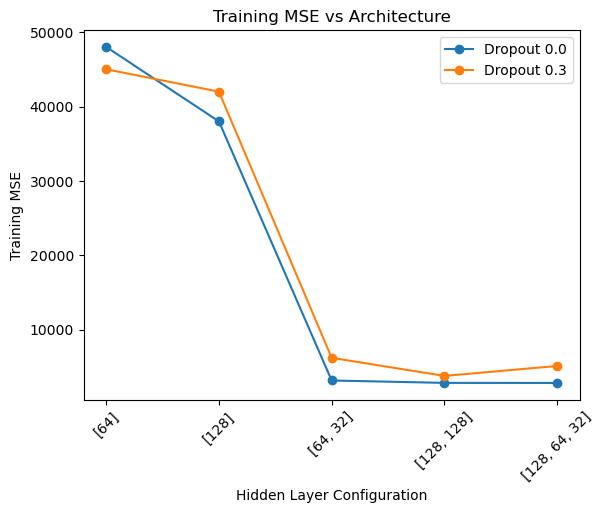

In [204]:
import pandas as pd

# Convert results to a DataFrame for visualization
training_results_df = pd.DataFrame(training_results)

# Plot Training MSE vs. Architecture
for dropout_rate in dropout_rates:
    subset = training_results_df[training_results_df['dropout_rate'] == dropout_rate]
    plt.plot(
        range(len(subset)),
        subset['mse_train'],
        marker='o',
        label=f"Dropout {dropout_rate}"
    )

plt.xticks(
    range(len(hidden_layer_configs)),
    [str(cfg) for cfg in hidden_layer_configs],
    rotation=45
)
plt.title("Training MSE vs Architecture")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Training MSE")
plt.legend()
plt.show()


Epoch 50/300, Training RMSE: 117.3618532888008
Epoch 100/300, Training RMSE: 85.13586193607615
Epoch 150/300, Training RMSE: 68.97411337728857
Epoch 200/300, Training RMSE: 61.39085395262909
Epoch 250/300, Training RMSE: 59.42011686445593
Epoch 300/300, Training RMSE: 58.58256987632347
Test MSE: 47698.48705024463
Test RMSE: 218.39983299042294


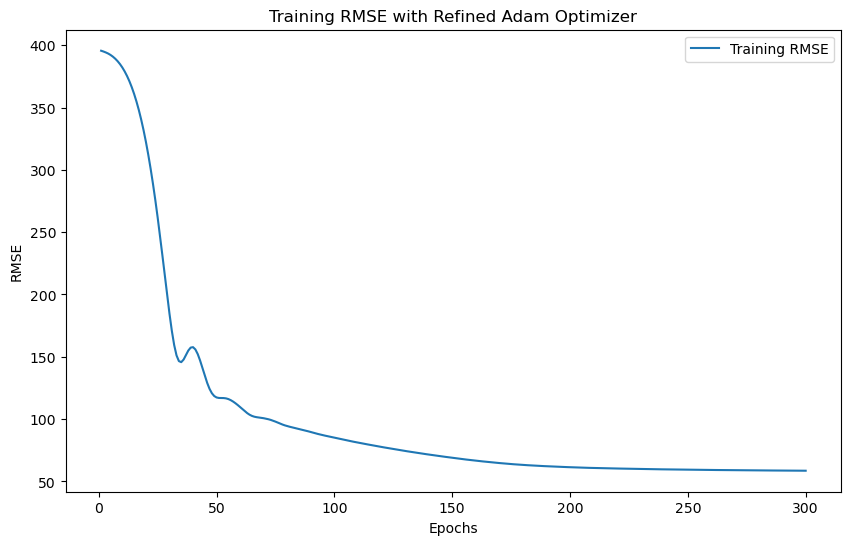

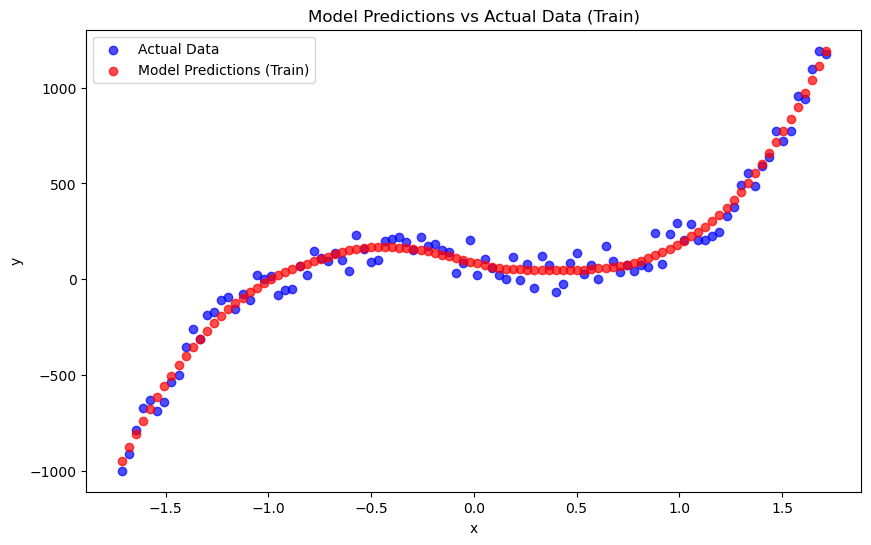

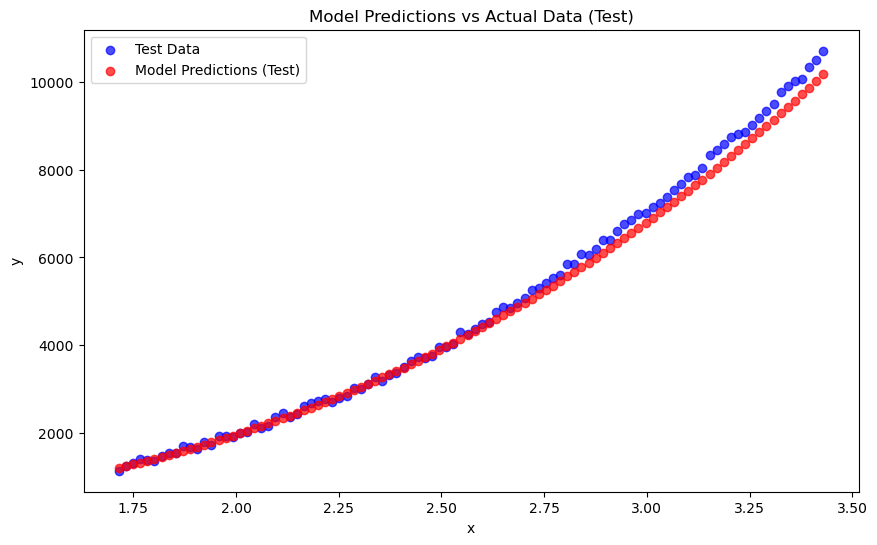

Final Training RMSE: 58.58256987632347


In [369]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt

# Set seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

import random
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization for weights
        nn.init.zeros_(m.bias)            # Initialize biases to zero


# Define the Neural Network with Dropout
class NeuralNetworkWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(NeuralNetworkWithDropout, self).__init__()
        self.layer1 = nn.Linear(3, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        return x

# Initialize weights


# Training function
def train_with_full_data(
    x_train, y_train, dropout_rate=0.2, learning_rate=0.001, alpha=0.01, max_epochs=500
):
    # Normalize data

    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    # Initialize model and optimizer
    model = NeuralNetworkWithDropout(dropout_rate=dropout_rate)
    model.apply(init_weights)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

    training_rmse = []

    for epoch in range(max_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)

        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg

        loss.backward()
        optimizer.step()
        scheduler.step()

        # Compute RMSE for training
        model.eval()
        with torch.no_grad():
            train_predictions = model(x_train_tensor).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        training_rmse.append(train_rmse)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{max_epochs}, Training RMSE: {train_rmse}")

    # Plot RMSE over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(training_rmse) + 1), training_rmse, label="Training RMSE")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("Training RMSE with Adam Optimizer (Small Dataset)")
    plt.legend()
    plt.show()

    return model, training_rmse



# Train the final model with Adam optimizer
final_model, training_rmse = train_with_adam_refined(
    x_train=x_poly,
    y_train=y_train,
    x_test=x_test_poly,
    y_test=y_test,
    learning_rate=0.01,  # Optimal learning rate
    alpha=0.01,  # Reduced L2 regularization
    max_epochs=300  # Reduced epochs for quicker training
)


Epoch 100/450, Training RMSE: 287.78780665250315
Epoch 200/450, Training RMSE: 86.626652843813
Epoch 300/450, Training RMSE: 56.701911976031695
Epoch 400/450, Training RMSE: 54.79882630333677
Test MSE: 6933.352629049294
Test RMSE: 83.26675584559118


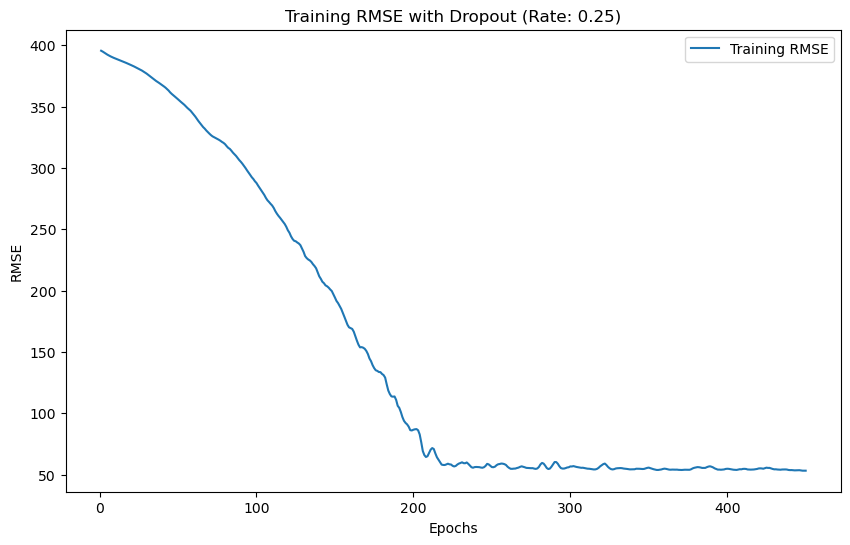

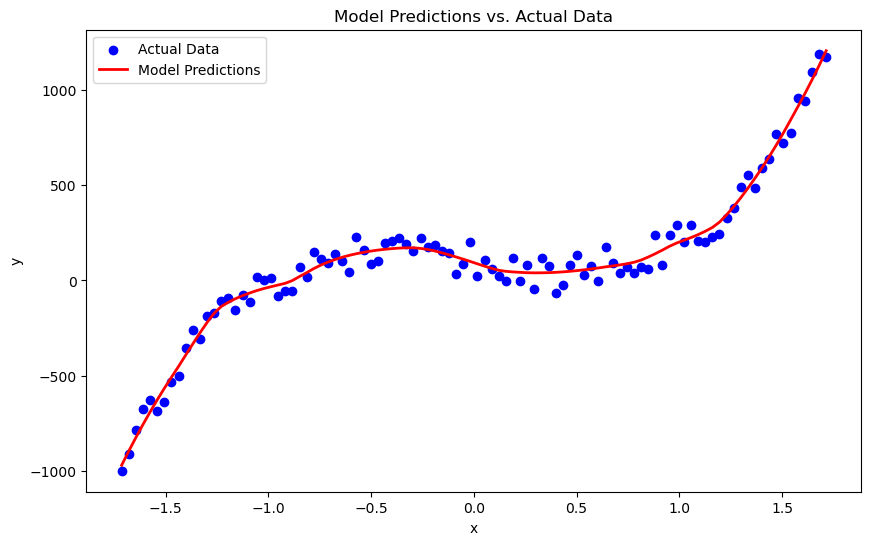

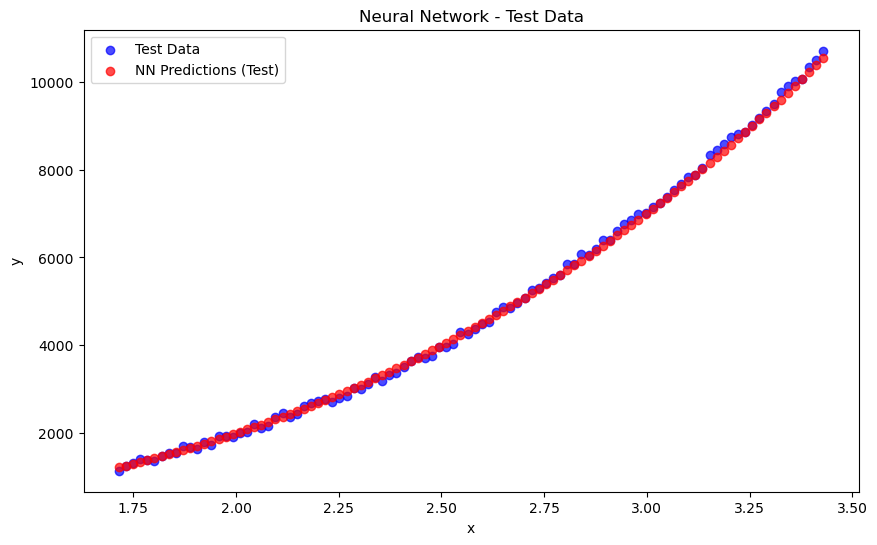

Final Training RMSE: 53.230831353434915


In [380]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random


def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

def init_weights(m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)  # Xavier for weights
            nn.init.zeros_(m.bias)    

# Define the PyTorch model with the optimal dropout rate
class NeuralNetworkWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.2):  # Optimal dropout rate
        super(NeuralNetworkWithDropout, self).__init__()
        self.layer1 = nn.Linear(3, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        return x
    
     
                 
      # Zero initialization for biases

# Apply the initialization

# Training function without a validation set
def train_with_dropout_on_full_data(
    x_train,
    y_train,
    dropout_rate=0.3,  # Optimal dropout rate
    learning_rate=0.01,  # Optimal learning rate
    alpha=0.03162277660168379,  # Optimal L2 regularization parameter
    max_epochs=600  # Number of epochs determined from convergence analysis
):
    # Convert the entire dataset to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    x_test_tensor = torch.tensor(x_test_poly, dtype=torch.float32)
  

    # Initialize the model, loss function, and optimizer
    model = NeuralNetworkWithDropout(dropout_rate=dropout_rate)
    model.apply(init_weights)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    training_rmse = []

    for epoch in range(max_epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)

        # L2 regularization
        l2_reg = sum(param.pow(2.0).sum() for param in model.parameters())
        loss += alpha * l2_reg

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # Compute RMSE
        model.eval()
        with torch.no_grad():
            train_predictions = model(x_train_tensor).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

        training_rmse.append(train_rmse)

        # Optional: Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{max_epochs}, Training RMSE: {train_rmse}")

    # Test predictions
    model.eval()
    with torch.no_grad():
        test_predictions = model(x_test_tensor).numpy()

    
    mse_nn = mean_squared_error(y_test, test_predictions)
    rmse_nn = np.sqrt(mse_nn)
    print(f"Test MSE: {mse_nn}")
    print(f"Test RMSE: {rmse_nn}")
    

    # Plot training RMSE over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(training_rmse) + 1), training_rmse, label="Training RMSE")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title(f"Training RMSE with Dropout (Rate: {dropout_rate})")
    plt.legend()
    plt.show()

    # Plot actual data and model predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train[:,0], y_train, label="Actual Data", color="blue")
    plt.plot(x_train[:,0], train_predictions, label="Model Predictions", color="red", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Model Predictions vs. Actual Data")
    plt.legend()
    plt.show()

    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test[:,0], y_test, label="Test Data", color="blue", alpha=0.7)
    plt.scatter(x_test[:,0], test_predictions, label="NN Predictions (Test)", color="red", alpha=0.7)
    plt.title("Neural Network - Test Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    print(f"Final Training RMSE: {training_rmse[-1]}")
    return model, training_rmse


# Train the final model with optimal parameters
final_model, training_rmse = train_with_dropout_on_full_data(
    x_train=x_poly,
    y_train=y_train,
    dropout_rate=0.25,  # Optimal dropout rate
    learning_rate=0.01,  # Optimal learning rate
    alpha=0.03162277660168379,  # Optimal L2 regularization parameter
    max_epochs=450  # Determined optimal number of epochs
)


Epoch 50/300, Training RMSE (Adam): 43.72452301034808
Epoch 100/300, Training RMSE (Adam): 43.16739448734313
Epoch 150/300, Training RMSE (Adam): 42.83270048930027
Epoch 200/300, Training RMSE (Adam): 42.66147580979346
Epoch 250/300, Training RMSE (Adam): 42.58715711480041
Epoch 300/300, Training RMSE (Adam): 42.55307673135219


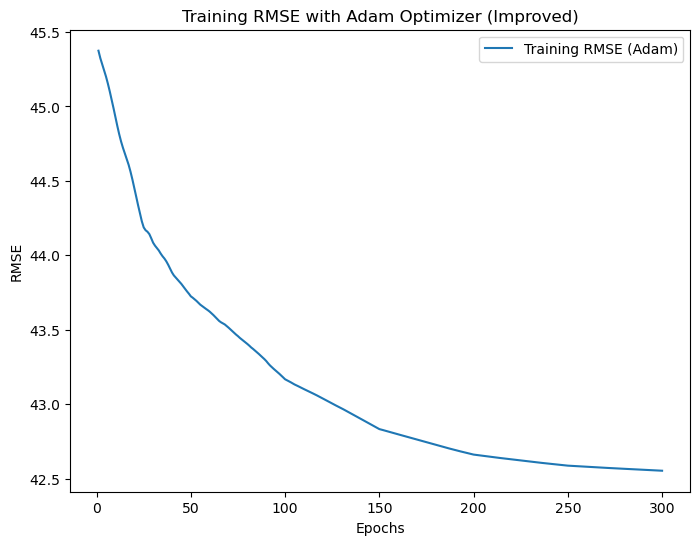

NeuralNetwork(
  (layer1): Linear(in_features=3, out_features=64, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

In [322]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(3, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

# Initialize model weights for better convergence
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

# Training function for Adam optimizer
def train_with_adam(x_train, y_train, learning_rate=0.01, epochs=300, step_size=50, gamma=0.5):
    # Normalize the training data

    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    # Initialize model and apply weight initialization
    model = NeuralNetwork()
    model.apply(init_weights)

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

    training_rmse = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)

        # Backward pass with gradient clipping
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        # Compute training RMSE
        model.eval()
        with torch.no_grad():
            train_predictions = model(x_train_tensor).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        training_rmse.append(train_rmse)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Training RMSE (Adam): {train_rmse}")

    # Plot training RMSE
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(training_rmse) + 1), training_rmse, label="Training RMSE (Adam)")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("Training RMSE with Adam Optimizer (Improved)")
    plt.legend()
    plt.show()

    return model

# Example: Generate synthetic data


train_with_adam(x_poly, y_train, learning_rate=0.01, epochs=300, step_size=50, gamma=0.5)




Epoch 50/300, Training RMSE (SGD): 45.43616566755123
Epoch 100/300, Training RMSE (SGD): 45.4288618751988
Epoch 150/300, Training RMSE (SGD): 45.425506324460585
Epoch 200/300, Training RMSE (SGD): 45.42391563522116
Epoch 250/300, Training RMSE (SGD): 45.42312083658535
Epoch 300/300, Training RMSE (SGD): 45.422723243755996


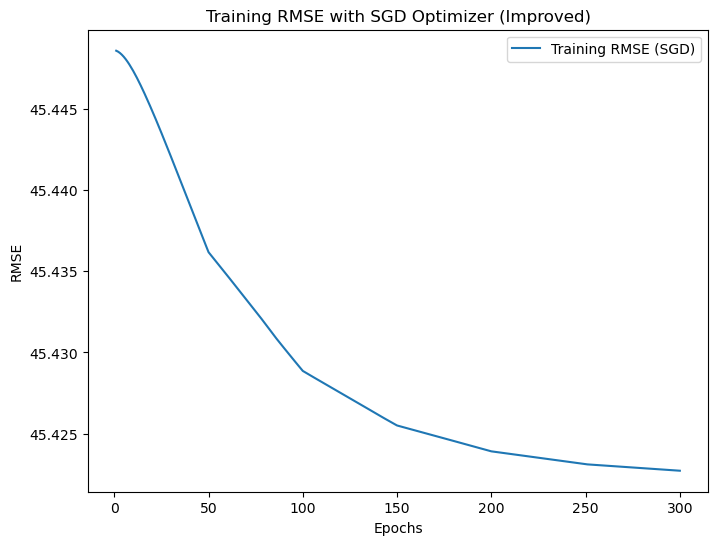

NeuralNetwork(
  (layer1): Linear(in_features=3, out_features=64, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

In [321]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the Neural Network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(3, 64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        return x

# Initialize model weights for better convergence
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

# Training function for SGD optimizer
def train_with_sgd(x_train, y_train, learning_rate=0.0001, momentum=0.9, epochs=300, step_size=50, gamma=0.5):
    # Normalize the training data
    # Convert to PyTorch tensors
    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    # Initialize model and apply weight initialization
    model = NeuralNetwork()
    model.apply(init_weights)

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

    training_rmse = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(x_train_tensor)
        loss = criterion(predictions, y_train_tensor)

        # Backward pass with gradient clipping
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        # Compute training RMSE
        model.eval()
        with torch.no_grad():
            train_predictions = model(x_train_tensor).numpy()
            train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        training_rmse.append(train_rmse)

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Training RMSE (SGD): {train_rmse}")

    # Plot training RMSE
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(training_rmse) + 1), training_rmse, label="Training RMSE (SGD)")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.title("Training RMSE with SGD Optimizer (Improved)")
    plt.legend()
    plt.show()

    return model

# Example: Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)
x_train = np.random.rand(100, 3) * 20 - 10
y_train = np.sin(x_train[:, 0]) * 50 + np.random.uniform(-50, 50, size=100)

# Train with SGD optimizer

# Train with SGD optimizer
train_with_sgd(x_poly, y_train, learning_rate=0.0001, epochs=300, step_size=50, gamma=0.5)



In [111]:
import pymc3 as pm

# Bayesian regression
with pm.Model() as model:
    # Priors
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    slope = pm.Normal("Slope", mu=0, sigma=10)
    sigma = pm.HalfNormal("Sigma", sigma=10)
    
    # Likelihood
    y_est = intercept + slope * x_train.squeeze()
    y_obs = pm.Normal("Y_obs", mu=y_est, sigma=sigma, observed=y_train)
    
    # Posterior sampling
    trace = pm.sample(1000, return_inferencedata=False)

# Visualize posterior distributions
pm.plot_posterior(trace)
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...



You can find the C code in this temporary file: C:\Users\User\AppData\Local\Temp\theano_compilation_error_w5ha77oz


Exception: ('Compilation failed (return status=1): C:\\Users\\User\\AppData\\Local\\Temp\\cch1nBk0.s: Assembler messages:\r. C:\\Users\\User\\AppData\\Local\\Temp\\cch1nBk0.s:112: Error: invalid register for .seh_savexmm\r. ', 'FunctionGraph(Elemwise{EQ}(<TensorType(float64, vector)>, <TensorType(int8, (True,))>))')